In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv("./healthcare.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,health_bills
0,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN
1,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5862.753890
2,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5461.261600
3,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,5158.241649
4,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0,2494.442474
5105,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0,2410.557012
5106,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0,NaN
5107,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0,2995.584938


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
health_bills         201
dtype: int64

In [5]:
df.dropna(axis = 0,how = 'any', inplace = True)

In [6]:
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)
df['stroke'] = df['stroke'].astype(str)

In [7]:
df = df.drop(['id'],axis = 1)

In [8]:
df.shape

(4908, 12)

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,health_bills
1,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5862.753890
2,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5461.261600
3,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,5158.241649
5,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,5205.962909
6,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,6055.759601
...,...,...,...,...,...,...,...,...,...,...,...,...
5103,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0,3576.149237
5104,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0,2494.442474
5105,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0,2410.557012
5107,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0,2995.584938


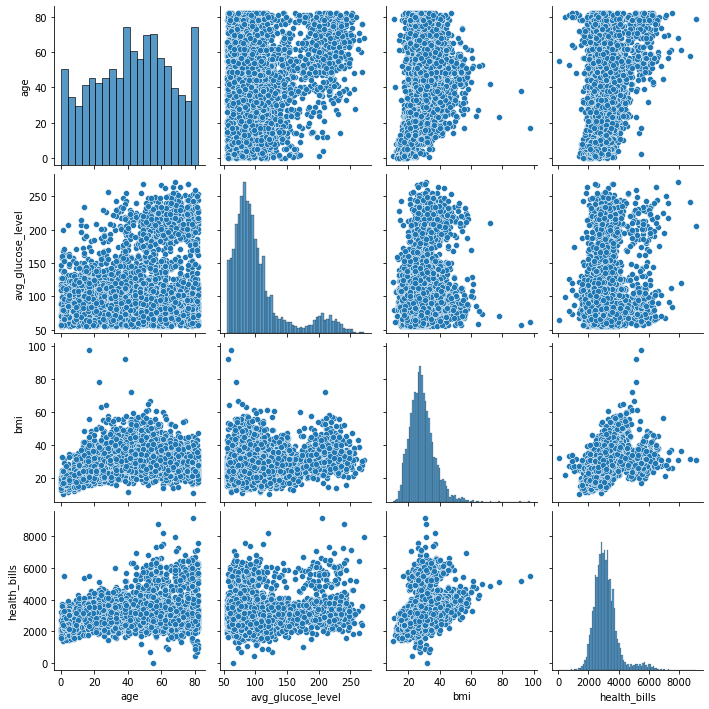

In [10]:
sns.pairplot(df)
plt.savefig("pairplot.png")

In [11]:
df.to_csv("df.csv",index = False, sep = ',')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 1 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   object 
 3   heart_disease      4908 non-null   object 
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   object 
 11  health_bills       4908 non-null   float64
dtypes: float64(4), object(8)
memory usage: 498.5+ KB


In [13]:
df.describe()

,age,avg_glucose_level,bmi,health_bills
count,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,105.297402,28.89456,3138.768172
std,22.556128,44.425550,7.85432,824.753675
min,0.080000,55.120000,10.30000,44.800880
25%,25.000000,77.067500,23.50000,2629.392701
50%,44.000000,91.680000,28.10000,3032.227510
75%,60.000000,113.495000,33.10000,3474.802737
max,82.000000,271.740000,97.60000,9100.536261


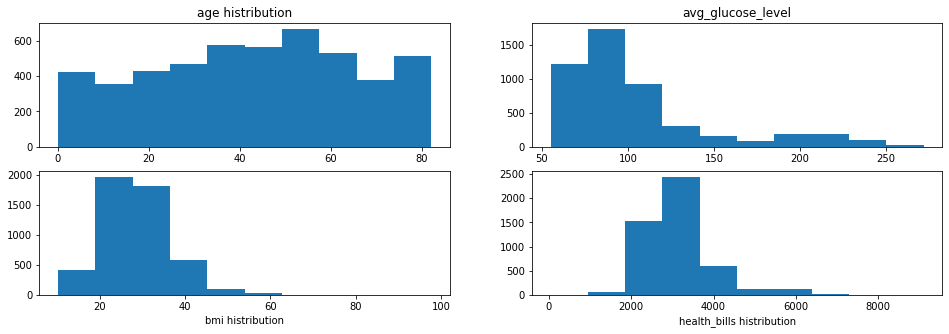

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16.18,5))
ax[0,0].hist(df.age)
ax[0,0].set_title('age histribution')
ax[0,1].hist(df.avg_glucose_level)
ax[0,1].set_title('avg_glucose_level')
ax[1,0].hist(df.bmi)
ax[1,0].set_xlabel('bmi histribution')
ax[1,1].hist(df.health_bills)
ax[1,1].set_xlabel('health_bills histribution')
plt.savefig("Distribution3.png")

# plt.hist(df.age)
# plt.title("Time distribution")
# plt.xlabel("Time")
# plt.ylabel("Count")
# plt.show()

In [15]:
df.skew()

age                 -0.119450
hypertension         2.826403
heart_disease        4.154536
avg_glucose_level    1.614619
bmi                  1.055063
stroke               4.532139
health_bills         1.585746
dtype: float64

In [16]:
df.kurtosis()

age                  -0.988033
hypertension          5.990996
heart_disease        15.266391
avg_glucose_level     1.907085
bmi                   3.362330
stroke               18.547844
health_bills          4.913264
dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 1 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   object 
 3   heart_disease      4908 non-null   object 
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   object 
 11  health_bills       4908 non-null   float64
dtypes: float64(4), object(8)
memory usage: 498.5+ KB


In [18]:
df_arr = np.array(df)

In [19]:
df_arr[2,11]

5158.2416490000005

In [20]:
sum1 = 0
sum2 = 0
sum3 = 0
for i in range(len(df_arr)):
    if df_arr[i,0] == 'Male':
        sum1 = sum1+df_arr[i,11]
    if df_arr[i,0] == 'Female':
        sum2 = sum2+df_arr[i,11]
    if df_arr[i,0] == 'Other':
        sum3 = sum3+df_arr[i,11]

In [21]:
sum3

0

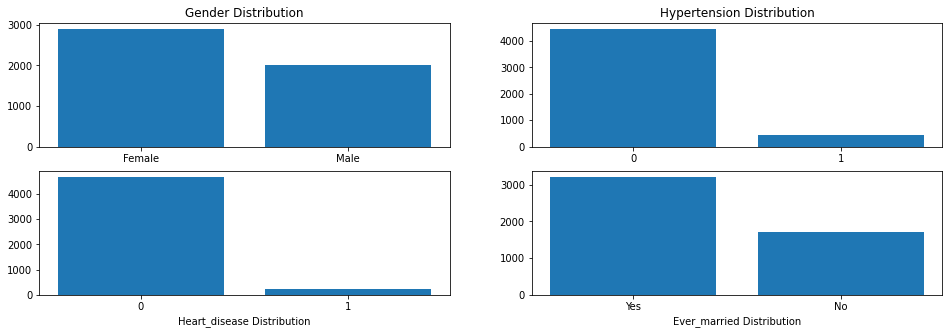

In [22]:
#categorial 用 bar
#gender, hypertension,  heart_disease,  ever_married ,work_type ,Residence_type, smoking_status, stroke.

x1 = df.gender.value_counts().index    #Values for x-axis
y1 = [df['gender'].value_counts()[i] for i in x1]   # Count of each class on y-axis

x2 = df.hypertension.value_counts().index    #Values for x-axis
y2 = [df['hypertension'].value_counts()[i] for i in x2]   # Count of each class on y-axis
x3 = df.heart_disease.value_counts().index    #Values for x-axis
y3 = [df['heart_disease'].value_counts()[i] for i in x3]   # Count of each class on y-axis
x4 = df.ever_married.value_counts().index    #Values for x-axis
y4 = [df['ever_married'].value_counts()[i] for i in x4]   # Count of each class on y-axis


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16.18,5))
ax[0,0].bar(x1,y1) 
ax[0,0].set_title('Gender Distribution')
ax[0,1].bar(x2,y2) 
ax[0,1].set_title('Hypertension Distribution')
ax[1,0].bar(x3,y3) 
ax[1,0].set_xlabel('Heart_disease Distribution')
ax[1,1].bar(x4,y4) 
ax[1,1].set_xlabel('Ever_married Distribution')
plt.savefig("Distribution.png")

In [23]:
ac = df.groupby('gender')

In [24]:
x1 = df.gender.value_counts().index    #Values for x-axis
y1 = [df['gender'].value_counts()[i] for i in x1]   # Count of each class on y-axis

In [25]:
df.health_bills.sum()

15405074.18631495

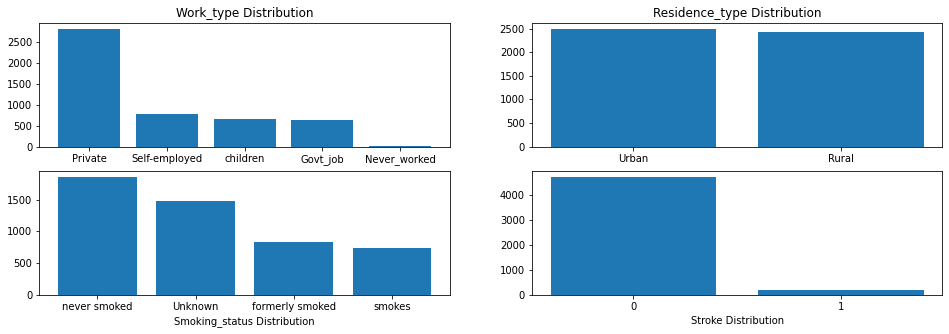

In [26]:
x4 = df.work_type.value_counts().index    #Values for x-axis
y4 = [df['work_type'].value_counts()[i] for i in x4]   # Count of each class on y-axis
x5 = df.Residence_type.value_counts().index    #Values for x-axis
y5 = [df['Residence_type'].value_counts()[i] for i in x5]   # Count of each class on y-axis
x6 = df.smoking_status.value_counts().index    #Values for x-axis
y6 = [df['smoking_status'].value_counts()[i] for i in x6]   # Count of each class on y-axis
x7 = df.stroke.value_counts().index    #Values for x-axis
y7 = [df['stroke'].value_counts()[i] for i in x7]   # Count of each class on y-axis


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16.18,5))
ax[0,0].bar(x4,y4) 
ax[0,0].set_title('Work_type Distribution')
ax[0,1].bar(x5,y5) 
ax[0,1].set_title('Residence_type Distribution')
ax[1,0].bar(x6,y6) 
ax[1,0].set_xlabel('Smoking_status Distribution')
ax[1,1].bar(x7,y7) 
ax[1,1].set_xlabel('Stroke Distribution')
plt.savefig("Distribution2.png")

Text(0, 0.5, 'health bills')

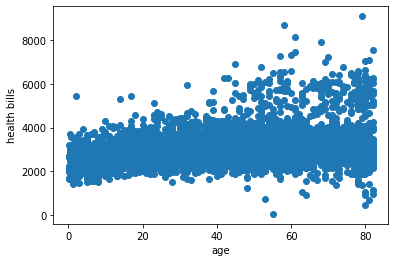

In [27]:
plt.scatter(df['age'],df['health_bills'])
plt.xlabel('age')
plt.ylabel('health bills')

Text(0, 0.5, 'health bills')

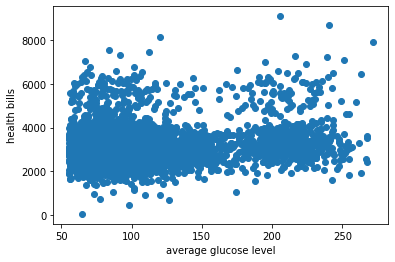

In [28]:
plt.scatter(df['avg_glucose_level'],df['health_bills'])
plt.xlabel('average glucose level')
plt.ylabel('health bills')

Text(0, 0.5, 'health bills')

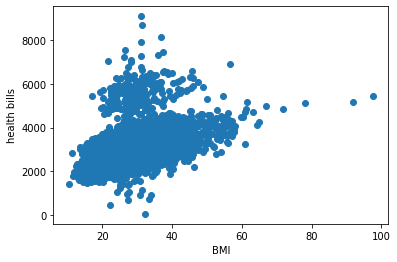

In [29]:
plt.scatter(df['bmi'],df['health_bills'])
plt.xlabel('BMI')
plt.ylabel('health bills')

In [30]:
corrections = abs(df.corr())

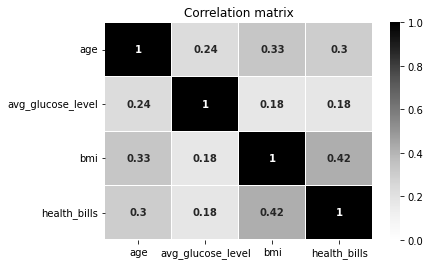

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.heatmap(corrections,cmap=plt.cm.Greys,linewidths=0.05,vmax=1,vmin=0,annot = True,annot_kws={'size':10,'weight':'bold'})
ax.set_title('Correlation matrix')
ax.set_ylim([4,0])
plt.savefig("heatmap.png")

In [32]:
df.groupby('gender').size().sort_values(ascending = False)

gender
Female    2897
Male      2011
dtype: int64

In [33]:
df.groupby('smoking_status').size().sort_values(ascending = False)

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
dtype: int64

In [64]:
# df_set = pd.get_dummies(df,drop_first = True)
df_set = pd.get_dummies(df)

In [65]:
a = df_set.corr()['health_bills']

In [66]:
pd.DataFrame(a).to_csv("cat.csv")

In [67]:
t_data = df_set['health_bills']

In [68]:
df_set=df_set.drop(['health_bills'],axis =1)

In [69]:
df_set

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
1,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
2,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1
3,69.0,94.39,22.8,0,0,0,0,0,1,0,0,1,0,1,0,1
5,78.0,58.57,24.2,0,0,0,1,0,1,0,0,1,0,0,0,1
6,81.0,80.43,29.7,0,1,0,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,57.0,76.62,28.2,1,0,0,1,0,0,0,0,0,0,1,0,0
5104,68.0,91.68,40.8,1,0,0,1,0,0,1,0,1,0,0,0,0
5105,9.0,71.88,17.5,1,0,0,0,0,0,0,1,1,0,0,0,0
5107,82.0,71.97,28.3,1,1,0,1,0,0,1,0,0,0,1,0,0


In [70]:
pd.DataFrame(df_set).to_csv("df_set.csv")

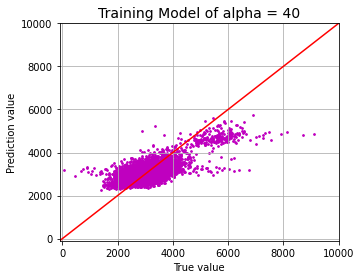

In [76]:
X_train = np.array(df_set)
t_train = np.array(t_data)
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
ll = Lasso(alpha=40)
ll.fit(X_train, t_train)
th_train = ll.predict(X_train)
alphas_lasso, coefs_lasso,_ = lasso_path(X_train, t_train, fit_intercept=False)
# Plot training and test predictions
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(t_train, th_train, c='m', s=3)
ax.plot([-100,10000],[-100,10000],color = 'r')
ax.set_xlim(-100,10000)
ax.set_ylim(-100,10000)
ax.set_xlabel("True value")
ax.set_ylabel("Prediction value")
ax.grid(True)
ax.set_title("Training Model of alpha = 40", fontsize=14)
plt.savefig("Train.png")

In [72]:
t_train

array([5862.75389 , 5461.2616  , 5158.241649, ..., 2410.557012,
       2995.584938, 3187.680142])

In [73]:
th_train

array([4867.68285845, 4562.04287899, 4421.14069827, ..., 2507.38881633,
       3143.49400653, 3022.07694151])

In [74]:
wL = ll.coef_ 

In [75]:
np.around(wL,decimals = 4)

array([ 3.0360000e+00,  8.0890000e-01,  3.8370900e+01,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00, -0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
       -0.0000000e+00, -0.0000000e+00,  0.0000000e+00,  1.5100178e+03])

In [46]:
def get_rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
Rmse = get_rmse(t_train,th_train)
print(Rmse)

571.7532739647165


In [47]:
alpha = np.linspace(1,100,800)
Rmse_set = []

In [48]:
true = []
predict = []

In [49]:
for i in alpha:
    ll = Lasso(alpha=i)
    ll.fit(X_train, t_train)
    th_train = ll.predict(X_train)
    alphas_lasso, coefs_lasso,_ = lasso_path(X_train, t_train, fit_intercept=False)
    error = get_rmse(t_train,th_train)
    Rmse_set.append(error)
    true.append(t_train)
    predict.append(th_train)
    

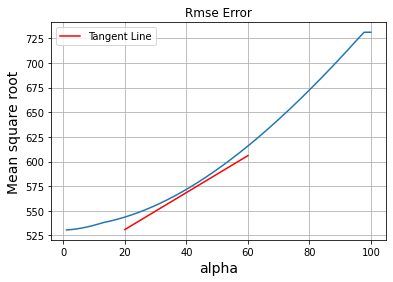

In [50]:
plt.plot(alpha,Rmse_set)
plt.title('Rmse Error')
plt.ylabel('Mean square root', fontsize=14)
plt.xlabel('alpha', fontsize=14)
plt.plot([20,60],[531,606],color = 'r',label = 'Tangent Line')
plt.grid(True)
plt.legend()
plt.savefig('error.png')

In [51]:
# pd.DataFrame(alpha).to_csv("alpha.csv")
# pd.DataFrame(true).to_csv("true.csv")
# pd.DataFrame(predict).to_csv("predict.csv")

In [78]:
pd.DataFrame(alpha).to_csv("alpha.csv")
pd.DataFrame(Rmse_set).to_csv("Rmse_set.csv")